# Notebook 2

## This Notebook Goals is:
* Connect to database 
* Query the table in database
* Preprocessing and Exploratory of data
* Analyzing and Visualizing the data by python

### Loading the necessary libraries

In [5]:
# import the libraries needed
import os
import sys
import pandas as pd
import datetime as dt
import psycopg2
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors
import plotly.io as pio
from matplotlib import pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.extract import connect_to_redshift

# using this library for reading password
from dotenv import load_dotenv
load_dotenv()

import warnings
warnings.filterwarnings('ignore')

In [6]:
# import variables from .env file
dbname = os.getenv("dbname")
host = os.getenv("host")
port = os.getenv("port")
user = os.getenv("user")
password = os.getenv("password")

In [7]:
connect = connect_to_redshift(dbname, host, port, user, password)

connection to redshift made


### Exracting the data by SOL query

In [8]:
query= """select * 
          from bootcamp.online_transactions_cleaned          
       """ 

online_trans_cleaned = pd.read_sql(query, connect)

In [9]:
online_trans_cleaned.head(5)

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France
1,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,19.95,1,19.95,2010-12-01 09:56:00,u1742,United Kingdom
2,536392,22128,PARTY CONES CANDY ASSORTED,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom
3,536404,22469,HEART OF WICKER SMALL,1.65,12,19.80,2010-12-01 11:29:00,u16218,United Kingdom
4,536412,22274,FELTCRAFT DOLL EMILY,2.95,2,5.90,2010-12-01 11:49:00,u1792,United Kingdom


In [10]:
online_trans_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399841 entries, 0 to 399840
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   invoice            399841 non-null  object        
 1   stock_code         399841 non-null  object        
 2   description        399841 non-null  object        
 3   price              399841 non-null  float64       
 4   quantity           399841 non-null  int64         
 5   total_order_value  399841 non-null  float64       
 6   invoice_date       399841 non-null  datetime64[ns]
 7   customer_id        399841 non-null  object        
 8   country            399841 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 27.5+ MB


# Exploratory Data Analysis

In [11]:
# Let's start with some basic exploratory data analysis

print("No. of unique invoices:", len(online_trans_cleaned.invoice.unique()))
print("No. of unique Stock Codes:", len(online_trans_cleaned.stock_code.unique()))
print("No. of unique Discription:", len(online_trans_cleaned.description.unique()))
print("No. of unique Customers ID:", len(online_trans_cleaned.customer_id.unique()))
print("No. of unique Geographical Locations:", len(online_trans_cleaned.country.unique()))

print("\n The most expensive product Price:", online_trans_cleaned.price.max())
print("The average price of a Product:", round(online_trans_cleaned.price.mean(), 2))
print("Total Products sold:", (online_trans_cleaned.quantity.sum()))

No. of unique invoices: 21791
No. of unique Stock Codes: 3679
No. of unique Discription: 3644
No. of unique Customers ID: 4363
No. of unique Geographical Locations: 37

 The most expensive product Price: 1599.26
The average price of a Product: 2.95
Total Products sold: 4887800


In [12]:
online_trans_cleaned.country.value_counts()

country
United Kingdom          356158
Germany                   9081
France                    8154
EIRE                      7469
Spain                     2463
Netherlands               2330
Belgium                   1971
Switzerland               1844
Portugal                  1427
Australia                 1256
Norway                    1060
Italy                      783
Channel Islands            755
Finland                    653
Cyprus                     608
Sweden                     436
Austria                    387
Denmark                    375
Japan                      355
Poland                     336
USA                        291
Israel                     247
Unspecified                241
Singapore                  215
Iceland                    182
Canada                     150
Greece                     142
Malta                      123
United Arab Emirates        67
European Community          58
RSA                         57
Lebanon                     45


In [13]:
# What the top 10 spending customers?

customer_spend = online_trans_cleaned.groupby(['customer_id', 'country'])['total_order_value'].sum().sort_values(ascending=False).reset_index(name='total_spend').head(10)

In [14]:
print(customer_spend)

  customer_id         country  total_spend
0      u14646     Netherlands    278778.02
1      u18102  United Kingdom    259657.30
2       u1745  United Kingdom    189575.53
3      u14911            EIRE    132893.24
4      u12415       Australia    123638.18
5      u14156            EIRE    114335.77
6      u17511  United Kingdom     88138.20
7      u16684  United Kingdom     65920.12
8      u14096  United Kingdom     65164.79
9      u13694  United Kingdom     62961.54


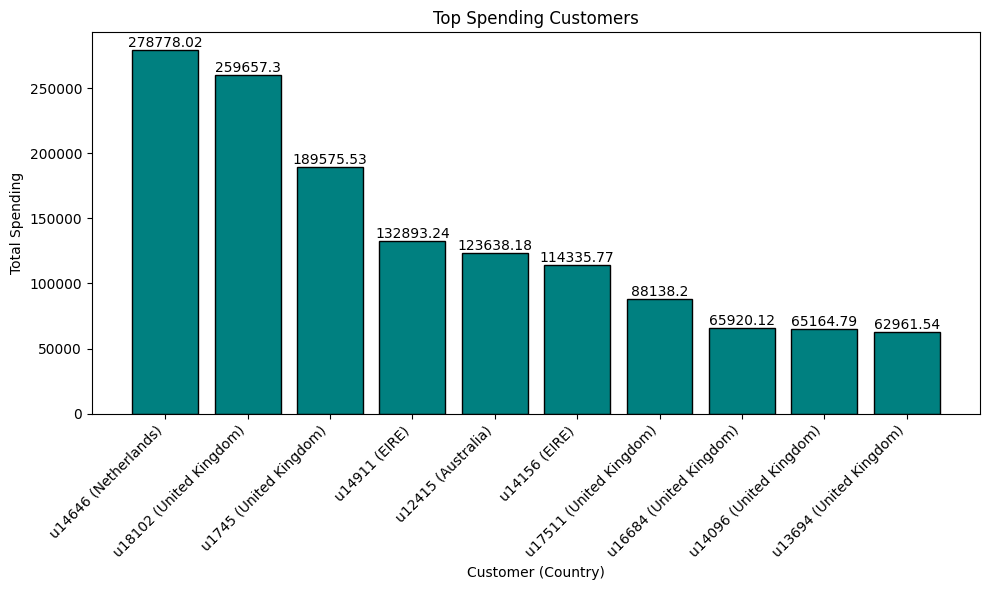

In [19]:
i
plt.figure(figsize=(10, 6))
bars = plt.bar(customer_spend.index, customer_spend['total_spend'], edgecolor='black', color='teal')
plt.xlabel('Customer (Country)')
plt.ylabel('Total Spending')
plt.title('Top Spending Customers')

# Annotate the bars with total spend values
for bar, spend in zip(bars, customer_spend['total_spend']):
    plt.text(bar.get_x() + bar.get_width() / 2, spend, str(spend), ha='center', va='bottom')

plt.xticks(customer_spend.index, customer_spend['customer_id'] + ' (' + customer_spend['country'] + ')', rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### 1. What are the top ten most popular geographical locations?

In [17]:
# Based on number of transaction
# Group the data by country and count the number of transactions
transactions_per_country = online_trans_cleaned['country'].value_counts()
transactions_per_country

country
United Kingdom          356158
Germany                   9081
France                    8154
EIRE                      7469
Spain                     2463
Netherlands               2330
Belgium                   1971
Switzerland               1844
Portugal                  1427
Australia                 1256
Norway                    1060
Italy                      783
Channel Islands            755
Finland                    653
Cyprus                     608
Sweden                     436
Austria                    387
Denmark                    375
Japan                      355
Poland                     336
USA                        291
Israel                     247
Unspecified                241
Singapore                  215
Iceland                    182
Canada                     150
Greece                     142
Malta                      123
United Arab Emirates        67
European Community          58
RSA                         57
Lebanon                     45


In [18]:
# Get the top ten most popular geographical locations
top_ten_geo_locations = transactions_per_country.head(10)
top_ten_geo_locations 

country
United Kingdom    356158
Germany             9081
France              8154
EIRE                7469
Spain               2463
Netherlands         2330
Belgium             1971
Switzerland         1844
Portugal            1427
Australia           1256
Name: count, dtype: int64

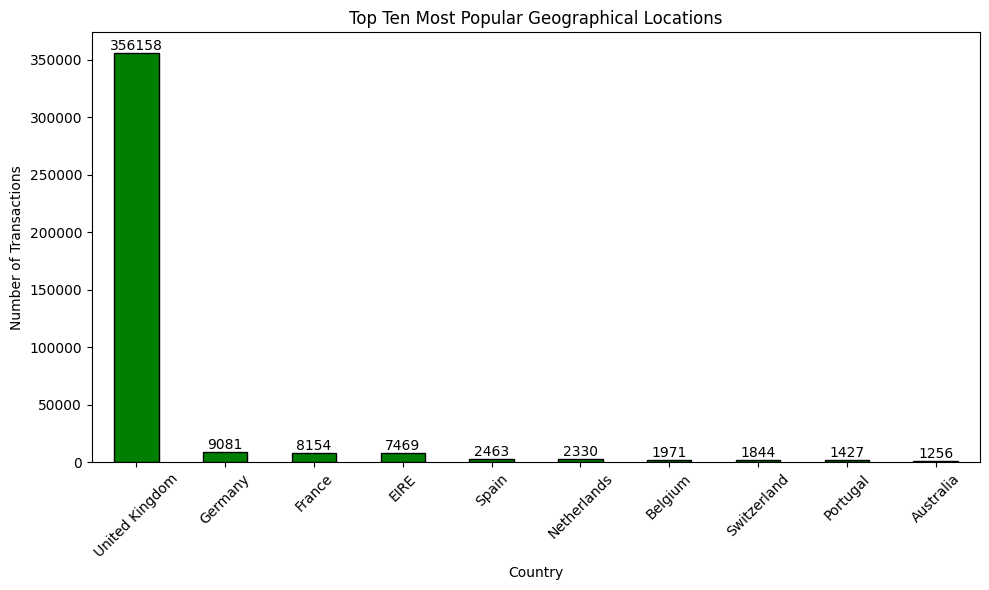

In [20]:
plt.figure(figsize=(10, 6))
bar_color = 'green'
ax = top_ten_geo_locations.plot(kind='bar', edgecolor='black', color=bar_color)
plt.title('Top Ten Most Popular Geographical Locations')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with the total number of transactions
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


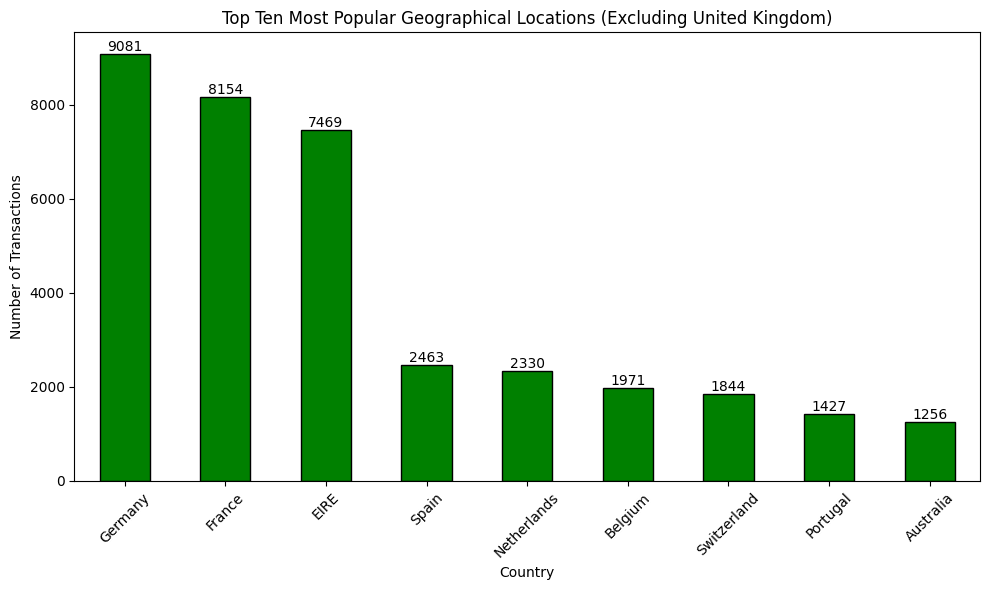

In [21]:

# Exclude the top 1st country (United Kingdom) from the DataFrame, because of huge diffrence and to get the better visualization
top_nine_geo_locations = top_ten_geo_locations.iloc[1:]

plt.figure(figsize=(10, 6))
bar_color = 'green'
ax = top_nine_geo_locations.plot(kind='bar', edgecolor='black', color=bar_color)
plt.title('Top Ten Most Popular Geographical Locations (Excluding United Kingdom)')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with the total number of transactions
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


#### 2. Which country spends the most (you can look at price, quantity or order value i.e. price * quantity)?

In [23]:
# Based on order value
grouped_data = online_trans_cleaned.groupby('country')['total_order_value'].sum().sort_values()

In [24]:
country_spending_most = grouped_data.sort_values(ascending=False).head(10)
print(country_spending_most)

country
United Kingdom    6815375.093
Netherlands        283479.540
EIRE               251557.470
Germany            200619.660
France             181571.540
Australia          136922.500
Switzerland         51859.400
Spain               51746.650
Belgium             36662.960
Japan               35419.790
Name: total_order_value, dtype: float64


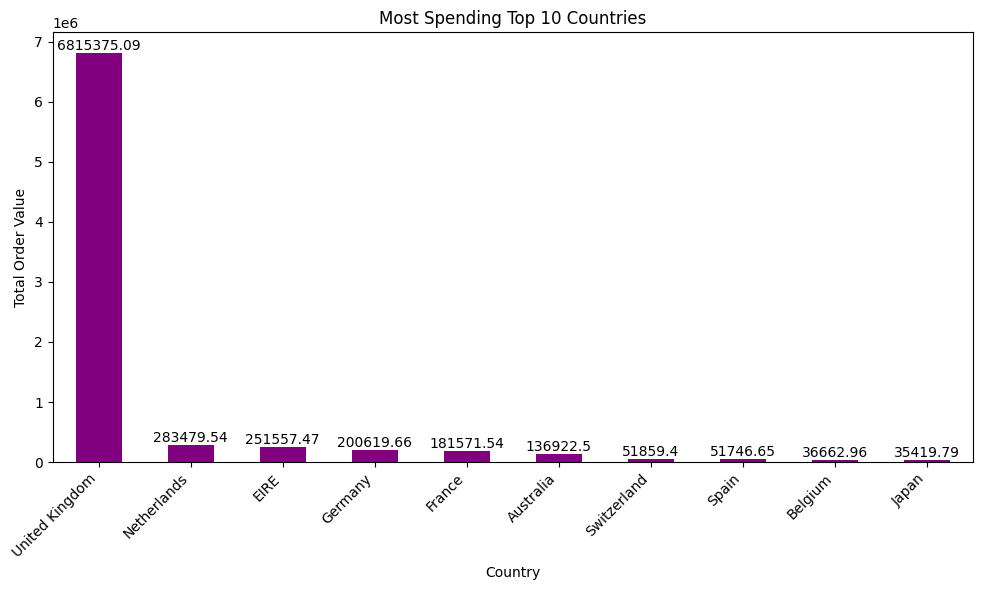

In [25]:

plt.figure(figsize=(10, 6))
bar_color = 'purple'
ax = country_spending_most.sort_values(ascending=False).plot(kind='bar', color=bar_color)
plt.xlabel('Country')
plt.ylabel('Total Order Value')
plt.title('Most Spending Top 10 Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the total order value
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


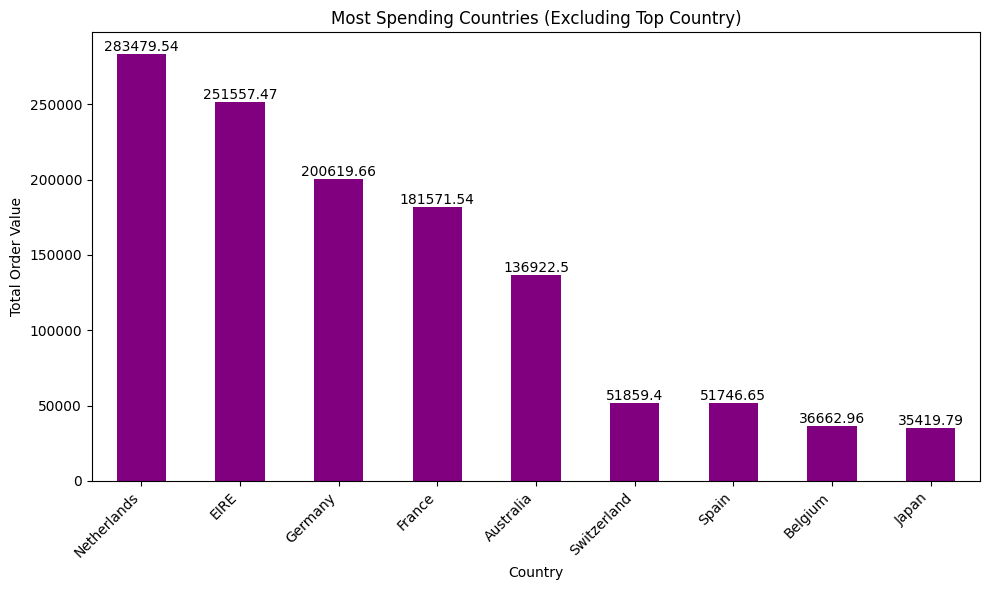

In [27]:

# Exclude the top 1st country (e.g., United Kingdom), to get clear visualization
country_spending_most_excluding_top = country_spending_most[1:]

plt.figure(figsize=(10, 6))
bar_color = 'purple'
ax = country_spending_most_excluding_top.sort_values(ascending=False).plot(kind='bar', color=bar_color)
plt.xlabel('Country')
plt.ylabel('Total Order Value')
plt.title('Most Spending Countries (Excluding Top Country)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the total order value
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [21]:
# Based on number of transaction

In [29]:
# Group the data by 'country' and count the unique invoices (transactions)
country_transactions = online_trans_cleaned.groupby('country')['invoice'].nunique()

# Get the top 10 countries with the highest number of transactions
top_10_countries = country_transactions.sort_values(ascending=False).head(10)

print("Top 10 countries based on number of transactions:")
print(top_10_countries)

Top 10 countries based on number of transactions:
country
United Kingdom    19583
Germany             578
France              439
EIRE                313
Belgium             117
Spain               100
Netherlands          97
Australia            67
Switzerland          65
Portugal             55
Name: invoice, dtype: int64


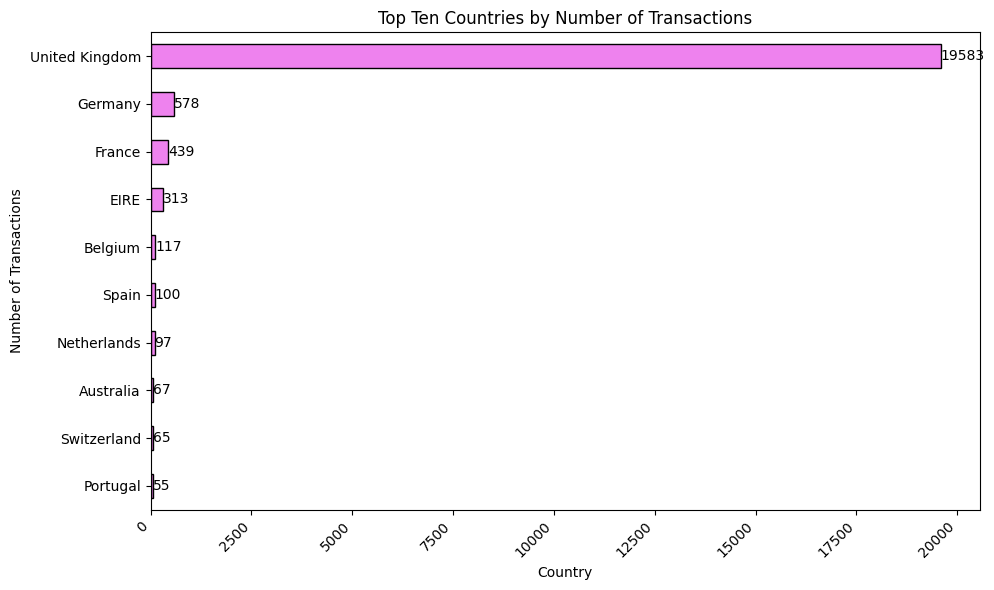

In [30]:

plt.figure(figsize=(10, 6))
bar_color = 'violet'
ax = top_10_countries.sort_values(ascending=True).plot(kind='barh', edgecolor='black', color=bar_color)
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.title('Top Ten Countries by Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the number of transactions
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.show()


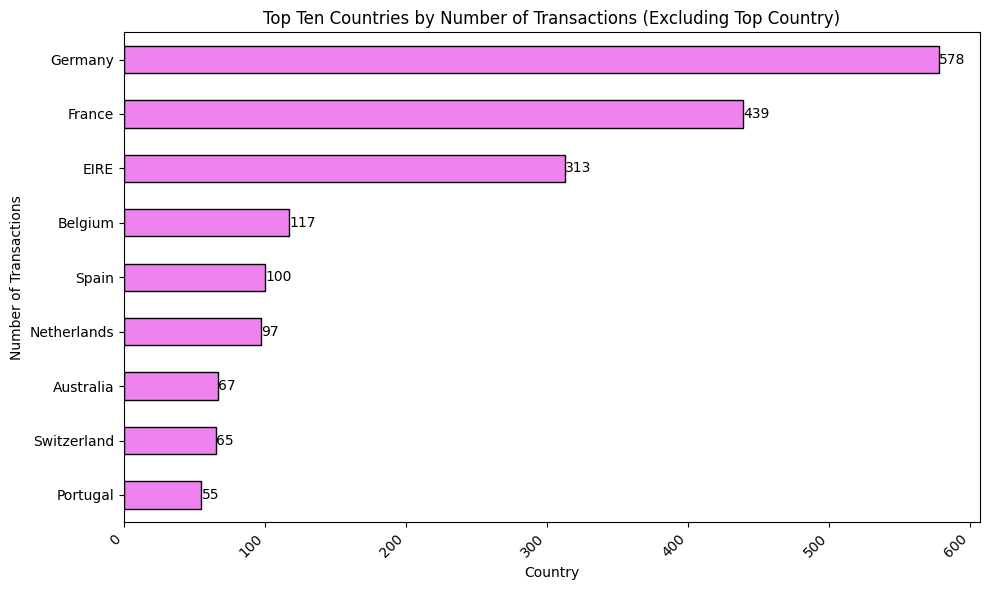

In [31]:
# Exclude the top 1st country (e.g., United Kingdom)
top_9_countries_excluding_top = top_10_countries[1:]

plt.figure(figsize=(10, 6))
bar_color = 'violet'
ax = top_9_countries_excluding_top.sort_values(ascending=True).plot(kind='barh', edgecolor='black', color=bar_color)
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.title('Top Ten Countries by Number of Transactions (Excluding Top Country)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the number of transactions
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.show()


* Based on transaction volume, the United Kingdom emerges as the leading country, followed by Germany, France, and EIRE. These countries demonstrate the highest frequency of transactions within the observed dataset.

 However, when considering expenditure in terms of total order value – calculated by the product of quantity and price – the     United Kingdom remains at the forefront, with Netherlands, EIRE, and Germany sequentially following suit. This analysis     highlights that while the United Kingdom holds the position of highest transaction frequency, it also retains its dominance in terms of overall spending, with Netherlands, EIRE, and Germany contributing significantly to the total order value.

In essence, the transaction landscape is characterized by the United Kingdom's preeminence both in terms of transaction count and total order value, while other nations such as the Netherlands, EIRE, and Germany also play crucial roles in driving substantial order value.

In [33]:
# Top most popular products
top_selling_items = online_trans_cleaned.groupby(['stock_code', 'description'])['quantity'].sum().reset_index()
top_selling_items = top_selling_items.sort_values(by='quantity', ascending=False).head(10)

print("Top Ten Best-Selling Items:")
print(top_selling_items)


Top Ten Best-Selling Items:
     stock_code                         description  quantity
2812      84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
1092      22197                      POPCORN HOLDER     48689
3235     85099B             JUMBO BAG RED RETROSPOT     44963
3069      84879       ASSORTED COLOUR BIRD ORNAMENT     35215
3249     85123A  CREAM HANGING HEART T-LIGHT HOLDER     34185
425       21212     PACK OF 72 RETROSPOT CAKE CASES     33386
1923      23084                  RABBIT NIGHT LIGHT     27045
1356      22492             MINI PAINT SET VINTAGE      25880
1473      22616          PACK OF 12 LONDON TISSUES      25305
914       21977  PACK OF 60 PINK PAISLEY CAKE CASES     24129


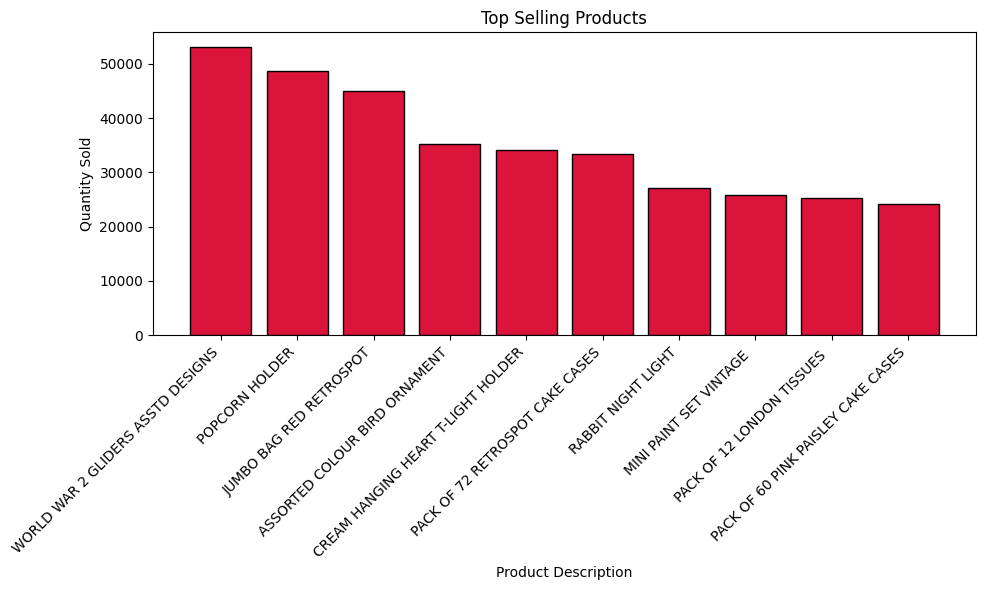

In [34]:

# Plotting the top selling products
plt.figure(figsize=(10, 6))
plt.bar(top_selling_items['description'], top_selling_items['quantity'], edgecolor='black', color='crimson')
plt.ylabel('Quantity Sold')
plt.xlabel('Product Description')
plt.title('Top Selling Products')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


#### 3.You could look at seasonality
* a. Visualize the distribution of Invoices per month?       
* b. Which month has the highest number of transactions?
* c. Which day of the week has the highest number of transactions?


In [44]:
# a. Visualize the distribution of Invoices per month?
# Convert 'invoice_date' column to datetime format
online_trans_cleaned['invoice_date'] = pd.to_datetime(online_trans_cleaned['invoice_date'])

In [45]:
# Extract year and month from the 'invoice_date' column
online_trans_cleaned['year'] = online_trans_cleaned['invoice_date'].dt.year
online_trans_cleaned['month'] = online_trans_cleaned['invoice_date'].dt.month

In [46]:
# Group data by year and month, and count the number of unique invoices
invoices_per_month = online_trans_cleaned.groupby(['year', 'month'])['invoice'].nunique()
invoices_per_month

year  month
2010  12       1692
2011  1        1225
      2        1181
      3        1588
      4        1358
      5        1808
      6        1686
      7        1555
      8        1506
      9        2038
      10       2208
      11       3034
      12        912
Name: invoice, dtype: int64

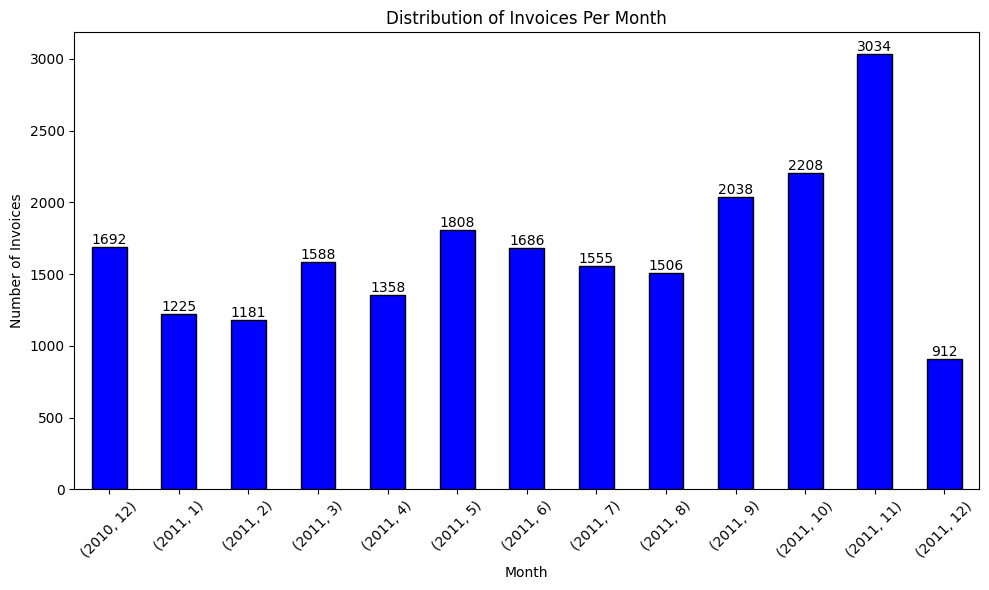

In [47]:
# Create a line plot for the distribution of invoices per month
plt.figure(figsize=(10, 6))
bar_color = 'blue'
ax = invoices_per_month.plot(kind='bar', edgecolor='black', color=bar_color)
plt.title('Distribution of Invoices Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with the number of invoices
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [48]:
# Which month has the highest number of transactions?
# Group data by month and count the number of transactions
transactions_per_month = online_trans_cleaned.groupby('month')['invoice'].nunique()
transactions_per_month

month
1     1225
2     1181
3     1588
4     1358
5     1808
6     1686
7     1555
8     1506
9     2038
10    2208
11    3034
12    2604
Name: invoice, dtype: int64

In [49]:
# Find the month with the highest number of transactions
highest_month = transactions_per_month.idxmax()
highest_transactions = transactions_per_month.max()

In [50]:
print(f"The month with the highest number of transactions is {highest_month} with {highest_transactions} transactions.")

The month with the highest number of transactions is 11 with 3034 transactions.


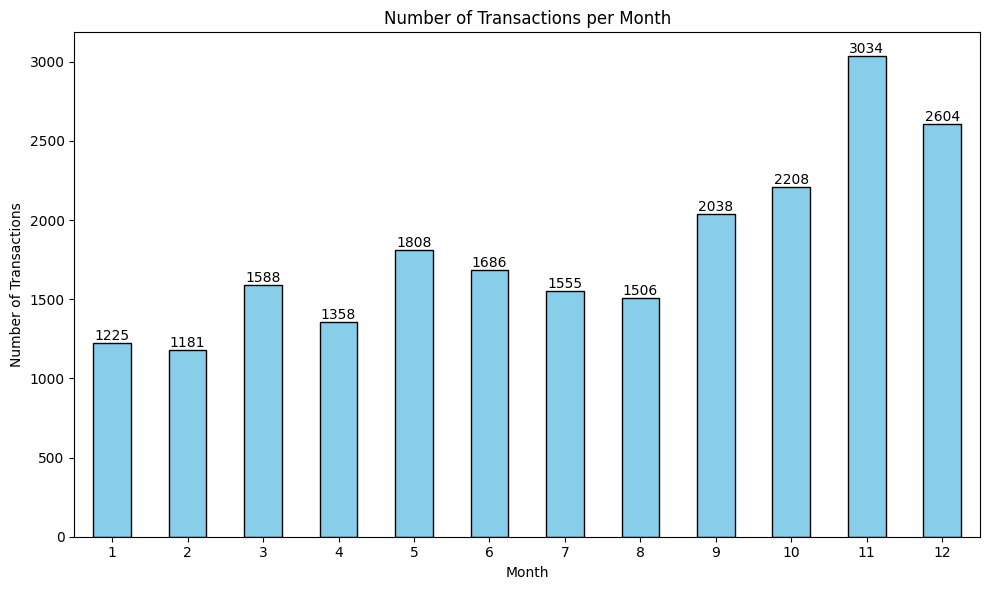

In [51]:
# Distribution of transaction per month
# Plotting the number of transactions per month

plt.figure(figsize=(10, 6))
bar_color = 'skyblue'
ax = transactions_per_month.plot(kind='bar', edgecolor='black', color=bar_color)
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Month')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()

# Annotate the bars with the number of transactions
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [52]:
# c. Which day of the week has the highest number of transactions?

In [53]:
# Extract the day of the week (0=Monday, 6=Sunday) from the 'invoice_date' column
online_trans_cleaned['day_of_week'] = online_trans_cleaned['invoice_date'].dt.dayofweek

# Define day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Add 'day_name' column to the DataFrame
online_trans_cleaned['day_name'] = [day_names[day] for day in online_trans_cleaned['day_of_week']]
online_trans_cleaned

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,year,month,day_of_week,day_name
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France,2010,12,2,Wednesday
1,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,19.95,1,19.95,2010-12-01 09:56:00,u1742,United Kingdom,2010,12,2,Wednesday
2,536392,22128,PARTY CONES CANDY ASSORTED,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom,2010,12,2,Wednesday
3,536404,22469,HEART OF WICKER SMALL,1.65,12,19.80,2010-12-01 11:29:00,u16218,United Kingdom,2010,12,2,Wednesday
4,536412,22274,FELTCRAFT DOLL EMILY,2.95,2,5.90,2010-12-01 11:49:00,u1792,United Kingdom,2010,12,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399836,581476,22998,TRAVEL CARD WALLET KEEP CALM,0.42,72,30.24,2011-12-09 08:48:00,u12433,Norway,2011,12,4,Friday
399837,581478,23126,DOLLCRAFT GIRL AMELIE,4.95,4,19.80,2011-12-09 08:59:00,u17364,United Kingdom,2011,12,4,Friday
399838,581493,79190B,RETRO PLASTIC POLKA TRAY,0.42,15,6.30,2011-12-09 10:10:00,u12423,Belgium,2011,12,4,Friday
399839,581501,22807,SET OF 6 T-LIGHTS TOADSTOOLS,1.25,12,15.00,2011-12-09 10:46:00,u12985,United Kingdom,2011,12,4,Friday


In [54]:
# Group data by day of the week and count the number of transactions
transactions_per_day = online_trans_cleaned.groupby('day_name')['invoice'].nunique()
transactions_per_day

day_name
Friday       3294
Monday       3418
Sunday       2334
Thursday     4888
Tuesday      3812
Wednesday    4045
Name: invoice, dtype: int64

In [55]:
# Find the day with the highest number of transactions
highest_day = transactions_per_day.idxmax()
highest_transactions = transactions_per_day.max()

print(f"The day with the highest number of transactions is {highest_day} with {highest_transactions} transactions.")

The day with the highest number of transactions is Thursday with 4888 transactions.


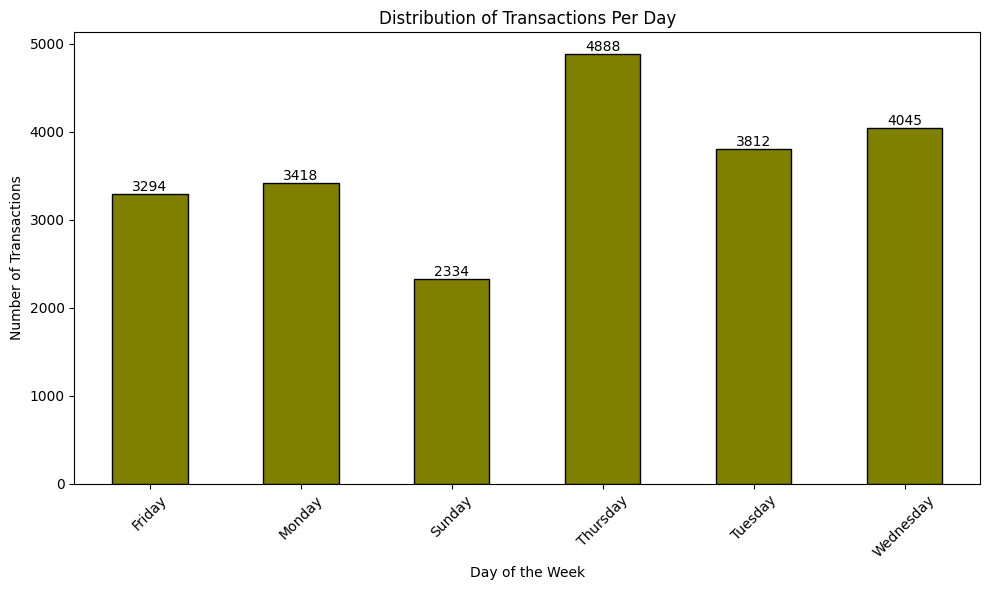

In [57]:
# Create a bar graph for the distribution of transactions per day

plt.figure(figsize=(10, 6))
bar_color = 'olive'
ax = transactions_per_day.plot(kind='bar', edgecolor='black', color=bar_color)
plt.title('Distribution of Transactions Per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with the number of transactions
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [39]:
# To find out which invoice did maximum transactons in DOW
# Extract DOW_transaction using groupby as per invoices

day_transaction=online_trans_cleaned.groupby('invoice')['day_of_week'].sum().sort_values(ascending=False).reset_index(name= 'day_transaction')
day_transaction

,invoice,day_transaction
0,567183,2346
1,547063,1686
2,554098,1536
3,566290,1242
4,556484,1194
...,...,...
21786,558892,0
21787,542736,0
21788,542737,0
21789,542739,0


In [40]:
# To find out customer_id & country alongwith invoices spend most DOW transaction in year
# Flitering areas where invocie.year = 2011
online_trans_cleaned.groupby(['customer_id','invoice','country'])['invoice_date'].value_counts().sort_values(ascending=False).reset_index(name='day_of_week_spend')

,customer_id,invoice,country,invoice_date,day_of_week_spend
0,u14096,576339,United Kingdom,2011-11-14 15:27:00,542
1,u14096,579196,United Kingdom,2011-11-28 15:54:00,533
2,u14096,580727,United Kingdom,2011-12-05 17:17:00,529
3,u14096,578270,United Kingdom,2011-11-23 13:39:00,442
4,u14096,573576,United Kingdom,2011-10-31 14:09:00,435
...,...,...,...,...,...
21817,u15764,564354,United Kingdom,2011-08-24 15:09:00,1
21818,u14145,C561810,United Kingdom,2011-07-29 15:12:00,1
21819,u17677,537228,United Kingdom,2010-12-06 08:43:00,1
21820,u17677,537229,United Kingdom,2010-12-06 08:44:00,1


In [41]:
online_trans_cleaned.columns

Index(['invoice', 'stock_code', 'description', 'price', 'quantity',
       'total_order_value', 'invoice_date', 'customer_id', 'country', 'year',
       'month', 'day_of_week', 'day_name'],
      dtype='object')

In [42]:
# To crosscheck invoice = 576339 has made 533 transactions in year 2011
online_trans_cleaned[(online_trans_cleaned.invoice == "576339")]

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,year,month,day_of_week,day_name
227172,576339,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,0.83,1,0.83,2011-11-14 15:27:00,u14096,United Kingdom,2011,11,0,Monday
227173,576339,21390,FILIGRIS HEART WITH BUTTERFLY,2.46,2,4.92,2011-11-14 15:27:00,u14096,United Kingdom,2011,11,0,Monday
227174,576339,21977,PACK OF 60 PINK PAISLEY CAKE CASES,1.25,5,6.25,2011-11-14 15:27:00,u14096,United Kingdom,2011,11,0,Monday
227175,576339,22367,CHILDRENS APRON SPACEBOY DESIGN,4.13,3,12.39,2011-11-14 15:27:00,u14096,United Kingdom,2011,11,0,Monday
227176,576339,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,3.29,3,9.87,2011-11-14 15:27:00,u14096,United Kingdom,2011,11,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397121,576339,22066,LOVE HEART TRINKET POT,3.29,3,9.87,2011-11-14 15:27:00,u14096,United Kingdom,2011,11,0,Monday
397122,576339,22439,6 ROCKET BALLOONS,1.25,3,3.75,2011-11-14 15:27:00,u14096,United Kingdom,2011,11,0,Monday
397123,576339,23217,LAUREL HEART ANTIQUE SILVER,2.46,3,7.38,2011-11-14 15:27:00,u14096,United Kingdom,2011,11,0,Monday
397124,576339,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,2.46,3,7.38,2011-11-14 15:27:00,u14096,United Kingdom,2011,11,0,Monday


#### 4. Which customers could be considered high profile customers?
* a. Calculate an order value field, this is the price * quantity.
     Identify customers that have spent more than the average user.
* b. Which customers have purchased the most (look at the frequency of orders)?
* c. Can you say anything about customers that purchased recently?

   


In [43]:
# Define a spending threshold for high-profile customers
spending_threshold = 1000  # Adjust this threshold as needed

# Calculate total spending for each customer
customer_spending = online_trans_cleaned.groupby(['customer_id','country'])['total_order_value'].sum().nlargest(10)

# Identify high-profile customers based on spending threshold
high_profile_customers = customer_spending[customer_spending > spending_threshold]

# Print the list of high-profile customers
print("High-Profile Customers:")
print(high_profile_customers)


High-Profile Customers:
customer_id  country       
u14646       Netherlands       278778.02
u18102       United Kingdom    259657.30
u1745        United Kingdom    189575.53
u14911       EIRE              132893.24
u12415       Australia         123638.18
u14156       EIRE              114335.77
u17511       United Kingdom     88138.20
u16684       United Kingdom     65920.12
u14096       United Kingdom     65164.79
u13694       United Kingdom     62961.54
Name: total_order_value, dtype: float64


In [44]:
# Group data by 'customer_id' and calculate relevant metrics
# For each customer, caculate two metrics: 
# 'total_order_value':The sum of all the order values the customer made.
# 'invoice': The number of unique invoices the customer has.

customer_metrics = online_trans_cleaned.groupby('customer_id').agg({'total_order_value': 'sum','invoice': 'nunique'})
top_customers = customer_metrics.nlargest(10, 'total_order_value')
top_customers

,total_order_value,invoice
customer_id,,
u14646,278778.02,74
u18102,259657.30,60
u1745,189575.53,49
u14911,132893.24,243
u12415,123638.18,24
u14156,114335.77,65
u17511,88138.20,45
u16684,65920.12,30
u14096,65164.79,17


In [45]:
# Defining criteria for high-profile customers
# Total order value should be greater than or equal to $1000.
# The number of unique invoices (transactions) should be greater than or equal to 5.
high_profile_criteria = (
    (customer_metrics['total_order_value'] >= 1000) &  # Total spending criterion
    (customer_metrics['invoice'] >= 5)  # Frequency of purchases criterion
)
high_profile_criteria

customer_id
u12346    False
u12347     True
u12348    False
u12349    False
u1235     False
          ...  
u1828     False
u18281    False
u18282    False
u18283     True
u18287    False
Length: 4363, dtype: bool

In [46]:
# Identify high-profile customers based on the criteria
# 'high_profile_customers' that contains only the customers who meet the high-profile criteria.
# This DataFrame will only have rows for customers who are considered high-profile.

high_profile_customers = customer_metrics[high_profile_criteria]
high_profile_customers

,total_order_value,invoice
customer_id,,
u12347,4310.00,7
u12352,1265.41,8
u12359,6182.98,6
u12362,4665.58,13
u1238,2423.56,5
...,...,...
u18245,2507.56,8
u18257,2274.03,11
u1826,2580.15,8


In [47]:
# Print or analyze the list of high-profile customers
print("High-Profile Customers:")
print(high_profile_customers)

High-Profile Customers:
             total_order_value  invoice
customer_id                            
u12347                 4310.00        7
u12352                 1265.41        8
u12359                 6182.98        6
u12362                 4665.58       13
u1238                  2423.56        5
...                        ...      ...
u18245                 2507.56        8
u18257                 2274.03       11
u1826                  2580.15        8
u18272                 3064.78        7
u18283                 2039.58       16

[1158 rows x 2 columns]


###### a. Calculate an order value field, this is the price * quantity. Identify customers that have spent more than the average user.

In [48]:
# Calculate the average order value per customer
avg_order_per_customer = online_trans_cleaned.groupby('customer_id')['total_order_value'].mean()
avg_order_per_customer

customer_id
u12346     0.000000
u12347    23.681319
u12348    53.231111
u12349    20.243750
u1235     18.400000
            ...    
u1828     18.060000
u18281    11.545714
u18282    13.584615
u18283     2.836690
u18287    26.246857
Name: total_order_value, Length: 4363, dtype: float64

In [49]:
# Find the overall average order value across all customers
overall_avg_order = online_trans_cleaned['total_order_value'].mean()
overall_avg_order

20.71690357667173

In [50]:
# Identify customers who have spent more than the average user
above_avg_spending_customers = avg_order_per_customer[avg_order_per_customer > overall_avg_order]

print("High-Spending Customers:")
print(above_avg_spending_customers)
# Total no. customers spending above average are 1363

High-Spending Customers:
customer_id
u12347     23.681319
u12348     53.231111
u12353     22.250000
u12355     35.338462
u12356     42.886724
             ...    
u18246    149.025000
u18251    269.670000
u18259     55.680952
u18273     68.000000
u18287     26.246857
Name: total_order_value, Length: 1363, dtype: float64


##### b. Which customers have purchased the most (look at the frequency of orders)?

In [51]:
# Group data by 'customer_id' and count the number of unique invoices
customer_order_frequency = online_trans_cleaned.groupby('customer_id')['total_order_value'].nunique().nlargest(10)
customer_order_frequency

customer_id
u14911    481
u12748    395
u17841    377
u14646    362
u14156    347
u14088    331
u15311    331
u14096    304
u14298    267
u12415    262
Name: total_order_value, dtype: int64

In [52]:
# Identify customers who have purchased the most (highest order frequency)
most_purchased_customers = customer_order_frequency[customer_order_frequency == customer_order_frequency.max()]
most_purchased_customers

customer_id
u14911    481
Name: total_order_value, dtype: int64

In [53]:
# Print or analyze the list of customers who have purchased the most
print("Customers Who Have Purchased the Most:")
print(most_purchased_customers)

Customers Who Have Purchased the Most:
customer_id
u14911    481
Name: total_order_value, dtype: int64


##### c. Can you say anything about customers that purchased recently?

In [54]:
# Customers who Purchased Recently
recent_purchases_customers = online_trans_cleaned.groupby(['customer_id','country'])['invoice_date'].max().nlargest(10)
recent_purchases_customers

customer_id  country       
u1268        France           2011-12-09 12:50:00
u13113       United Kingdom   2011-12-09 12:49:00
u15804       United Kingdom   2011-12-09 12:31:00
u13777       United Kingdom   2011-12-09 12:25:00
u17581       United Kingdom   2011-12-09 12:21:00
u12748       United Kingdom   2011-12-09 12:20:00
u12713       Germany          2011-12-09 12:16:00
u12526       Germany          2011-12-09 12:09:00
u16705       United Kingdom   2011-12-09 12:08:00
u15311       United Kingdom   2011-12-09 12:00:00
Name: invoice_date, dtype: datetime64[ns]

In [55]:
recent_purchases_customers = online_trans_cleaned.groupby(['customer_id', 'country'])\
    .agg(recent_invoice_date=('invoice_date', 'max'),
         product_descriptions=('description', 'unique'))\
    .nlargest(10, 'recent_invoice_date').reset_index()

print(recent_purchases_customers)


  customer_id         country recent_invoice_date   
0       u1268          France 2011-12-09 12:50:00  \
1      u13113  United Kingdom 2011-12-09 12:49:00   
2      u15804  United Kingdom 2011-12-09 12:31:00   
3      u13777  United Kingdom 2011-12-09 12:25:00   
4      u17581  United Kingdom 2011-12-09 12:21:00   
5      u12748  United Kingdom 2011-12-09 12:20:00   
6      u12713         Germany 2011-12-09 12:16:00   
7      u12526         Germany 2011-12-09 12:09:00   
8      u16705  United Kingdom 2011-12-09 12:08:00   
9      u15311  United Kingdom 2011-12-09 12:00:00   

                                product_descriptions  
0  [CHILDRENS CUTLERY DOLLY GIRL , ROBOT BIRTHDAY...  
1  [REGENCY CAKESTAND 3 TIER, SWEETHEART CERAMIC ...  
2  [WORLD WAR 2 GLIDERS ASSTD DESIGNS, ROSES REGE...  
3  [PINK HEART SHAPE EGG FRYING PAN, FELTCRAFT BU...  
4  [4 SKY BLUE DINNER CANDLES, PACK OF 72 RETROSP...  
5  [ASSORTED COLOURS SILK FAN, VINTAGE SNAP CARDS...  
6  [RIBBON REEL MAKING SNOWMEN 

* The recent purchases data holds valuable insights:
   - Festive Season: The fact that multiple customers made purchases on the same day, 2011-12-09, could indicate a special occasion or festive season. This suggests that customers might be purchasing gifts for holidays, birthdays, or other celebrations.
   - Last-Minute Shopping: These recent purchases may indicate last-minute shopping tendencies. This trend is common around important occasions.  
   - Promotional Impact: Might have run promotions or special offers that encouraged multiple customers to make purchases on the same day. 


#### 5. Which customers have spent the least amount? What should the company do about such customers?
 

In [56]:
# Group data by 'customer_id' and calculate total spending for each customer
# Customer with lowest spending
customer_total_spending = online_trans_cleaned.groupby('customer_id')['total_order_value'].sum()


In [57]:
# Sort customers by total spending in ascending order
sorted_customers = customer_total_spending.sort_values()

# Convert the Series to a DataFrame and sort by total_order_value in ascending order
sorted_customers = customer_total_spending.to_frame(name='total_order_value').sort_values(by='total_order_value', ascending=True)

# Print the customers with the least spending
print("Customers with the Least Spending:")
print(sorted_customers.head(10))


Customers with the Least Spending:
             total_order_value
customer_id                   
u14213                -1192.20
u15823                 -811.86
u16742                 -464.90
u16252                 -295.09
u12666                 -227.44
u17307                 -152.64
u17548                 -141.48
u15728                 -134.80
u13958                 -102.45
u13829                 -102.00


In [58]:
# Convert the Series to a DataFrame and sort by total_order_value in ascending order
sorted_customers = customer_total_spending.to_frame(name='total_order_value').sort_values(by='total_order_value', ascending=True)
sorted_customers

,total_order_value
customer_id,
u14213,-1192.20
u15823,-811.86
u16742,-464.90
u16252,-295.09
u12666,-227.44
...,...
u12415,123638.18
u14911,132893.24
u1745,189575.53


- Negative total order values can occur when a customer returns items or receives a refund for a purchase they made earlier
- If an order is canceled after it has been placed, it can lead to a negative total order value as well. 
- The original positive value of the order would be reversed with a negative value to indicate the cancellation

- Decide on appropriate actions for such customers
- For example, company could offer special promotions, discounts, or personalized recommendations to increase their engagement and spending.
